# Heirarchical Agglomerative Clustering

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

### Import  and Prep Data

In [64]:
# Import scaled feature data
features_scaled = pd.read_csv('/Users/karina/GitHub/NYC_midterm_project/data/final_datasets/features_scaled_modeling.csv')
features_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
0,0.209833,0.497484,-0.281050,0.168836,-0.397033,1.401403,-0.520885,-0.346817,-0.259182,-0.607961,...,-0.05726,-0.05726,-0.099504,-0.099504,-0.081111,-0.05726,-0.05726,-0.099504,-0.099504,-0.05726
1,-0.178723,-0.367460,-0.281050,-0.403089,-0.710156,-0.236601,-0.347004,-0.293218,0.477897,-0.607961,...,-0.05726,-0.05726,-0.099504,-0.099504,-0.081111,-0.05726,-0.05726,-0.099504,-0.099504,-0.05726
2,-0.373000,-0.691814,-0.766385,-0.784372,-0.344845,-0.330201,-0.984567,-0.346817,-0.554014,-0.394861,...,-0.05726,-0.05726,-0.099504,-0.099504,-0.081111,-0.05726,-0.05726,-0.099504,-0.099504,-0.05726
3,-0.470139,0.443425,-0.232517,-0.403089,-0.188284,-1.172603,0.174638,-1.258001,-0.996261,0.244438,...,-0.05726,-0.05726,-0.099504,-0.099504,-0.081111,-0.05726,-0.05726,-0.099504,-0.099504,-0.05726
4,-0.373000,-1.394580,-0.329584,-0.212447,-0.083909,-0.845002,0.116678,-1.258001,-0.947122,-0.181762,...,-0.05726,-0.05726,-0.099504,-0.099504,-0.081111,-0.05726,-0.05726,-0.099504,-0.099504,-0.05726


In [65]:
X = np.array(features_scaled)

### Create Dendrogram

In [56]:
# define plot_dendrogram function
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

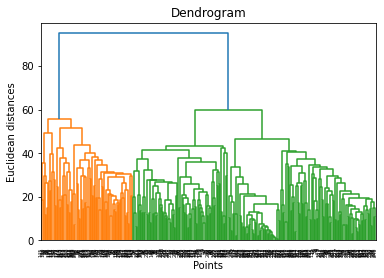

In [57]:
# Plot dendrogram
plot_dendrogram(X)

### Plot Clusters

In [61]:
# Create clustering object
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 2)

In [67]:
# fit and predict
y_hc = ac.fit_predict(features_scaled)

In [68]:
# Create plot
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

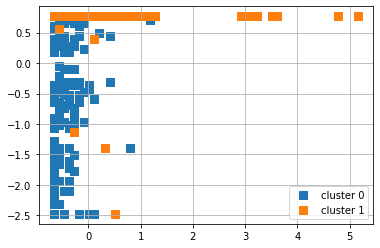

In [69]:
# Plot clustering result
plot_clusters(X,y_hc)

### Analyzing Data

In [86]:
clusters = y_hc.tolist()

In [87]:
# Import neighborhood data
neighborhood_data = pd.read_csv('/Users/karina/GitHub/NYC_midterm_project/data/old_datasets/old_dataset.csv')
neighborhood_data = neighborhood_data.iloc[:, 1:6]
neighborhood_data['clusters'] = clusters
neighborhood_data.head()

,id,borough,neighborhood,longitude,latitude,clusters
0,nyu_2451_34572.1,Bronx,Wakefield,-73.847201,40.894705,0
1,nyu_2451_34572.2,Bronx,Co-op City,-73.829939,40.874294,0
2,nyu_2451_34572.3,Bronx,Eastchester,-73.827806,40.887556,0
3,nyu_2451_34572.4,Bronx,Fieldston,-73.905643,40.895437,0
4,nyu_2451_34572.5,Bronx,Riverdale,-73.912585,40.890834,0


In [88]:
most_common_venues = pd.read_csv('/Users/karina/GitHub/NYC_midterm_project/data/final_datasets/most_common_venues.csv')
data = pd.merge(neighborhood_data, most_common_venues, on='id')
data = data.drop(columns=['id', 'longitude', 'latitude'])
data.head()

,borough,neighborhood,clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bronx,Wakefield,0,restaurant,store,clothing,school,church
1,Bronx,Co-op City,0,store,restaurant,church,school,clothing
2,Bronx,Eastchester,0,restaurant,school,bank,park,store
3,Bronx,Fieldston,0,school,bank,restaurant,store,park
4,Bronx,Riverdale,0,store,restaurant,school,bank,park


In [97]:
cluster0 = data.loc[data['clusters'] == 0]
cluster1 = data.loc[data['clusters'] == 1]

In [98]:
print('--cluster0--')
print()
print('Top 5 most common venue type')
print(cluster0['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 5 second most common venue type')
print(cluster0['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster0['borough'].value_counts()[:3])

--cluster0--

Top 5 most common venue type
restaurant    136
store          41
school         22
church         18
park            2
Name: 1st Most Common Venue, dtype: int64

Top 5 second most common venue type
store         112
restaurant     37
church         30
school         24
clothing        8
Name: 2nd Most Common Venue, dtype: int64

Most common borough
Queens           64
Staten Island    60
Bronx            51
Name: borough, dtype: int64


In [99]:
print('--cluster1--')
print()
print('Top 5 most common venue type')
print(cluster1['1st Most Common Venue'].value_counts()[:5])
print()
print('Top 5 second most common venue type')
print(cluster1['2nd Most Common Venue'].value_counts()[:5])
print()
print('Most common borough')
print(cluster1['borough'].value_counts()[:3])

--cluster1--

Top 5 most common venue type
restaurant    35
school        17
store         12
church         6
lodging        5
Name: 1st Most Common Venue, dtype: int64

Top 5 second most common venue type
store         28
school        18
restaurant    13
bar            9
church         5
Name: 2nd Most Common Venue, dtype: int64

Most common borough
Manhattan    36
Brooklyn     28
Queens       17
Name: borough, dtype: int64
